<a href="https://colab.research.google.com/github/Ravenha/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Bethany_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

Loading BokehJS ...

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-07-20 02:44:12--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data.1’

haberman.data.1     100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-07-20 02:44:12 (383 MB/s) - ‘haberman.data.1’ saved [3103/3103]



In [3]:
!ls

haberman.data  haberman.data.1	sample_data


In [4]:
data = pd.read_csv('haberman.data')
print(data.shape)

(305, 4)


In [5]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
print(df.shape)
df.head(20)

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [6]:
df.isna().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [0]:
my_columns = ["Age", "year", " Num_pos_aux_nod_det", "Survival_status"]
df.columns = my_columns

In [8]:
df.head(20)

,Age,year,Num_pos_aux_nod_det,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [0]:
df['Survival_status'] = df.Survival_status
df['Survival_status'] = df['Survival_status'].astype(int)

In [10]:
df.describe()

,Age,year,Num_pos_aux_nod_det,Survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
df.Survival_status.value_counts()

1    224
2     81
Name: Survival_status, dtype: int64

In [0]:
df['Survival_status'] = df.Survival_status.astype(str)

In [0]:
Survival_status = {'1': 0, '2': 1}
df.Survival_status = [Survival_status[item] for item in df.Survival_status]

In [14]:
df.head(20)

,Age,year,Num_pos_aux_nod_det,Survival_status
0,30,62,3,0
1,30,65,0,0
2,31,59,2,0
3,31,65,4,0
4,33,58,10,0
5,33,60,0,0
6,34,59,0,1
7,34,66,9,1
8,34,58,30,0
9,34,60,1,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

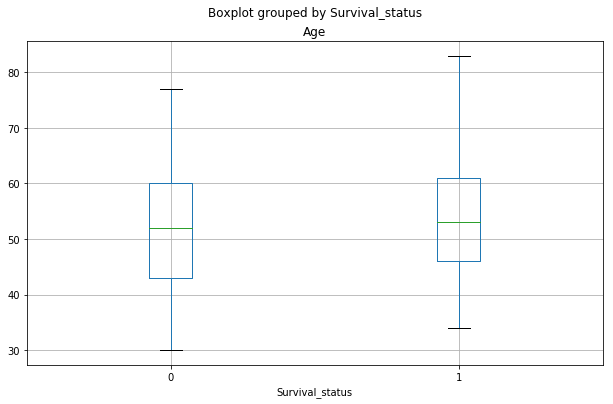

In [15]:
df.boxplot(column='Age', by='Survival_status', figsize=(10,6))
plt.show()

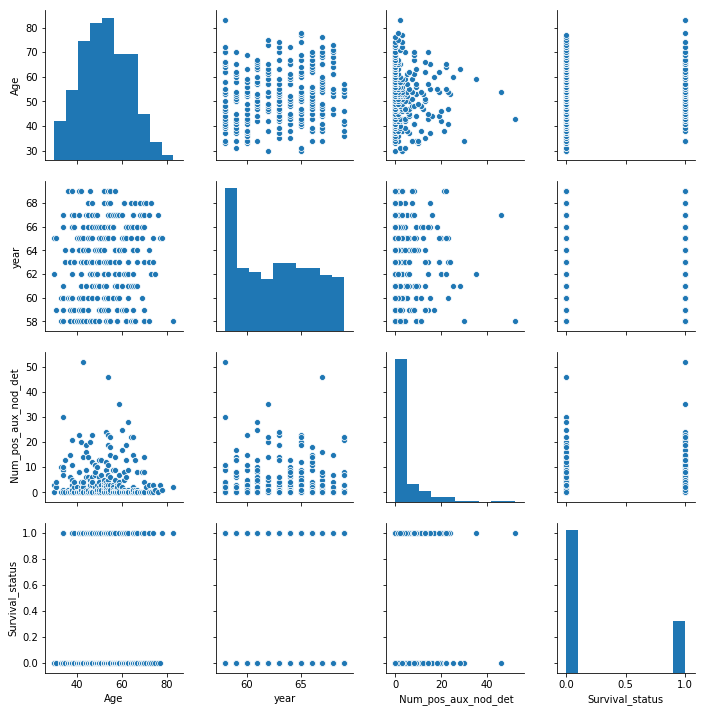

In [16]:
sns.pairplot(df);

<function matplotlib.pyplot.show>

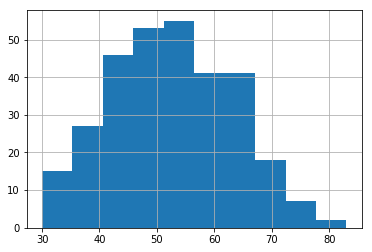

In [17]:
df.Age.hist()
plt.show

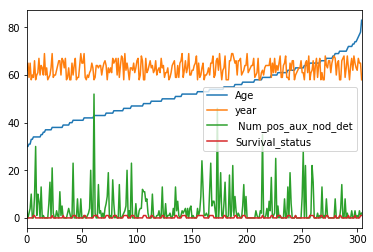

In [18]:
df.plot();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### Answers

## 1) The younger you are the more likely you are to survive. Also the less Number of positive axillary nodes detected the more likely you will survive.

## 2) The older you get the less likely you will survive. Also the more Number of positive axillary nodes detected the less likely of survival.

## 3) These features are related in that the older you get the less likely your body can withstand the proceedures since you will heal slower. Also as you age you are more likely to have a higher Number of positive axillary nodes detected than when you are younger. This could be that the younger test group had an earlier diagnosis as oppsed to their older counterparts. 